In [1]:
using DifferentialEquations
using Plots
using DelimitedFiles

# Plotting cell trajectories

In [2]:
n = 3 ### n = number of cells in your simulation

3

In [3]:
### load the trajectory files

Trajectory_file = Any[]
for i = 1:n
    Trajectory_file = readdlm("../results/Trajectory_Cell_$i.txt", ',',  Float64)
    @eval $(Symbol("Cell_$i")) = Trajectory_file
end


Time_file = Any[]
for i = 1:n
    Time_file = readdlm("../results/Trajectory_Time_$i.txt", ',',  Float64)
    @eval $(Symbol("Time_$i")) = Time_file
end

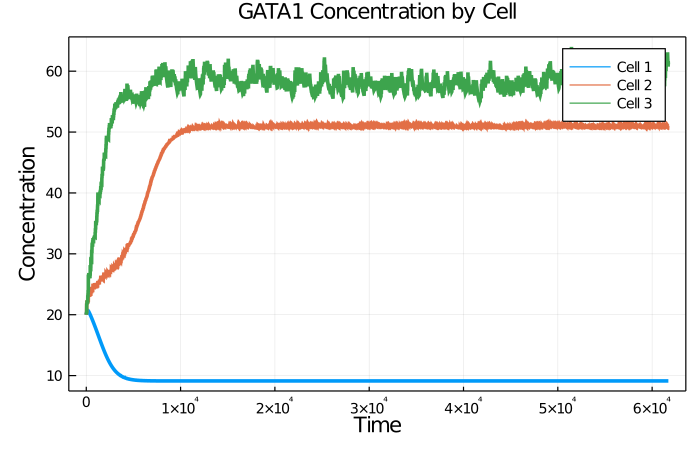

In [4]:
function plot_gata1()
    p = plot(eval(Symbol("Time_1")), eval(Symbol("Cell_1"))[:,1], 
                size = (700, 450), label = "Cell 1", 
                title = "GATA1 Concentration by Cell", titlefontsize = 12, guidefontsize = 12,
                framestyle = :box, tickfontsize = 8, legendfontsize = 8, thickness_scaling = 1.2,
                legend =:topright,xaxis = ("Time"), yaxis = ("Concentration"), linewidth = 3.0)
    for i = 2:n
        plot!(p, eval(Symbol("Time_"*string(i))), eval(Symbol("Cell_"*string(i)))[:,1], 
            label = "Cell $i", linewidth = 3.0)
    end
    return p
end

plot_gata1()

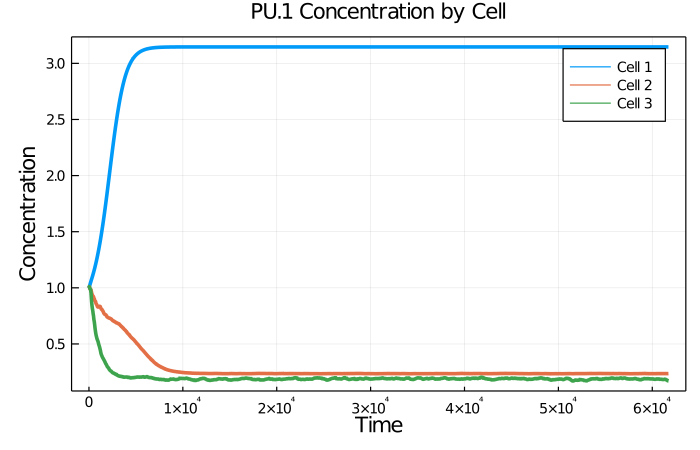

In [5]:
function plot_pu1()
    p = plot(eval(Symbol("Time_1")), eval(Symbol("Cell_1"))[:,2], 
                size = (700, 450), label = "Cell 1", 
                title = "PU.1 Concentration by Cell", titlefontsize = 12, guidefontsize = 12,
                framestyle = :box, tickfontsize = 8, legendfontsize = 8, thickness_scaling = 1.2,
                legend =:topright,xaxis = ("Time"), yaxis = ("Concentration"), linewidth = 3.0)
    for i = 2:n
        plot!(p, eval(Symbol("Time_"*string(i))), eval(Symbol("Cell_"*string(i)))[:,2], 
            label = "Cell $i", linewidth = 3.0)
    end
    return p
end

plot_pu1()

# Plotting distributions of cells

In [6]:
m = 3 ### m = number of cells in the simulation

3

In [7]:
### load the A0 values and probabilities

Prob_by_Cell = readdlm(string("../results/Topology_", string(m), "_cells.txt"), ',',  Float64)

5×4 Matrix{Float64}:
 0.7    0.0  0.6  1.0
 0.705  0.0  0.7  1.0
 0.71   0.0  0.6  1.0
 0.715  0.0  0.9  1.0
 0.72   0.0  1.0  1.0

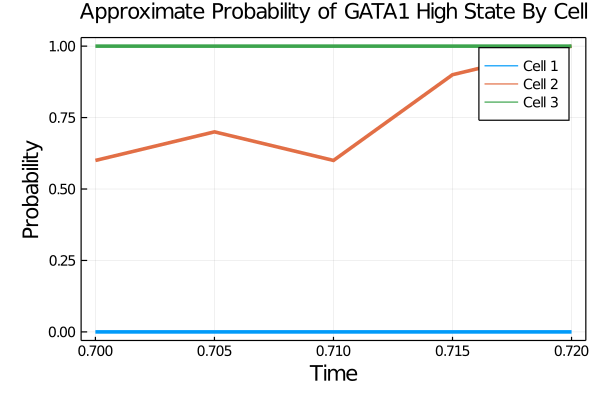

In [8]:
function plot_probabilities()
    p = plot(Prob_by_Cell[:,1], Prob_by_Cell[:,2], title = "Approximate Probability of GATA1 High State By Cell", 
            label = "Cell 1", titlefontsize = 12, guidefontsize = 12, framestyle = :box, tickfontsize = 8, 
            legendfontsize = 8, thickness_scaling = 1.2,legend =:topright,xaxis = ("Time"),
            yaxis = ("Probability"), linewidth = 3.0)
    for i = 2:m
        plot!(p, Prob_by_Cell[:,1], Prob_by_Cell[:,i+1], label = "Cell $i", linewidth = 3.0)
    end
    return p
end

plot_probabilities()

After running for a large number of iterations over a wide range of A0 values, curves can be fitted to the data points using:

In [ ]:
@. model(x, p) = p[1] + (p[2] / (1 + exp((p[3] - x) / p[4])) )
p0 = [-0.001, 1.01, 10.0, 1.0]
fit = curve_fit(model, Prob_by_Cell[:,1], Prob_by_Cell[:,2], p0)